# PROGRAMA DE CIENCIAS DE LOS DATOS 
## **CURSO: APRENDIZAJE AUTOMÁTICO (MACHINE LEARNING)**
### **TAREA #3**

Profesor: MSc. Felipe Meza


Alumnos: 

  Lester Salazar Viales
  
  Randal Salazar Viales

In [55]:
## Importar Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import math

##### Carga del conjunto de datos en un dataframe

In [56]:
#datos a visualizar
n=20
url = 'https://raw.githubusercontent.com/lsalazarv/Tarea-3/master/StudentsPerformance.csv'
df = pd.read_csv(url,skip_blank_lines=False,parse_dates=True,dayfirst=True)
# Visualizacion de las primeras 20 filas
print("Previsualización (Muestra) de los primeros ", n, " datos: ")
df.head(20)

Previsualización (Muestra) de los primeros  20  datos: 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


##### Exploración Inicial del Set de datos

In [57]:
print('Estad1stica descriptiva del Set de Datos')
print(df.describe())
print(" ")


print(" ")
print("Número de ceros por columna")
print((df == 0).astype(int).sum())

# Dimensión del conjunto de datos (Filas, columnas)
print(" ")
print("Dimensión del Dataframe (filas, columnas): ")
print(df.shape)

# Cantidad de Datos NO NULOS del conjunto de datos (columnas)
print(" ")
print("Cantidad de Datos NO NULOS (por columnas): ")
print(df.count())

# Visualización de si el Dataframe está VACIO
print(" ")
print("DATAFRAME está VACIO: ")
print(df.empty)

Estad1stica descriptiva del Set de Datos
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
 
 
Número de ceros por columna
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  0
writing score                  0
dtype: int64
 
Dimensión del Dataframe (filas, columnas): 
(1000, 8)
 
Cantidad de Datos NO NULOS (por columnas): 
gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch   

### Analisis Inicial

##### Descripción del conjunto de datos
Para la tarea 3, podemos decir que se esta utilizando un set de datos que corresponde al rendimiento de estudiantes para examenes de matematicas, lectura y escritura de acuerdo al genero, raza, nivel de educacion de los padres, curso de preparacion y si ha almorzado o no.

##### Exploracion Inicial
###### Del conjunto de datos podemos decir

*** La dimensión del conjunto de datos es de 1000 x 7

*** La media para matemáticas es:66.08900      Lecutra:69.169000      Escritura:68.054000

*** El conjunto de datos no posee valores nulos.



In [58]:
# parental level of education = PLE
# test preparation course = TPC
df.columns = ['gender','race/ethnicity','PLE','lunch','TPC','math','reading','writing']
cols_to_use = ['gender', 'race/ethnicity', 'PLE','lunch','TPC','math','reading','writing']
df = df[cols_to_use]

df.head(10)


,gender,race/ethnicity,PLE,lunch,TPC,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### Preprocesado de datos

##### Variables categoricas

Del conjunto de datos se identifican las siguientes variables categoricas

** Genero (gender)

** Raza/Etnia (race/ethnicity)

** Nivel de Educación de los padres (parental level of education)

** Almuerzo (lunch)

** Examen de preparación para el curso (test preparation course)

Se procede a binarizar las variables categoricas


In [59]:
# Binarizacion de genero
# Female = 1
# Male = 0

df['gender'] = df['gender'].replace({'male' : 'M', 'female' : 'F'})


# Race/Ethnicity
# group A = 1
# group B = 2
# group C = 3
# group D = 4
# group E = 5
df['race/ethnicity'] = df['race/ethnicity'].replace({'group A' : 1, 'group B' : 2, 'group C' : 3,'group D' : 4, 'group E' : 5})

#test preparation course
# none = 0
# completed = 1
df['test preparation course'] = df['TPC'].replace({'none' : 0, 'completed' : 1})

#lunch
# standard = 0
# free/reduced = 1
df['lunch'] = df['lunch'].replace({'standard' : 0, 'free/reduced' : 1})

df.head(10)

,gender,race/ethnicity,PLE,lunch,TPC,math,reading,writing,test preparation course
0,F,2,bachelor's degree,0,none,72,72,74,0
1,F,3,some college,0,completed,69,90,88,1
2,F,2,master's degree,0,none,90,95,93,0
3,M,1,associate's degree,1,none,47,57,44,0
4,M,3,some college,0,none,76,78,75,0
5,F,2,associate's degree,0,none,71,83,78,0
6,F,2,some college,0,completed,88,95,92,1
7,M,2,some college,1,none,40,43,39,0
8,M,4,high school,1,completed,64,64,67,1
9,F,2,high school,1,none,38,60,50,0


##### Agrupacion de datos




In [60]:
gender_race_mathscore = df.groupby(['gender','race/ethnicity','math'])['TPC'].sum()
gender_race_mathscore


gender  race/ethnicity  math
F       1               34               completed
                        37                    none
                        38                    none
                        41                    none
                        44                nonenone
                                       ...        
M       5               93                    none
                        94       nonecompletednone
                        97           nonecompleted
                        99               completed
                        100     completedcompleted
Name: TPC, Length: 460, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

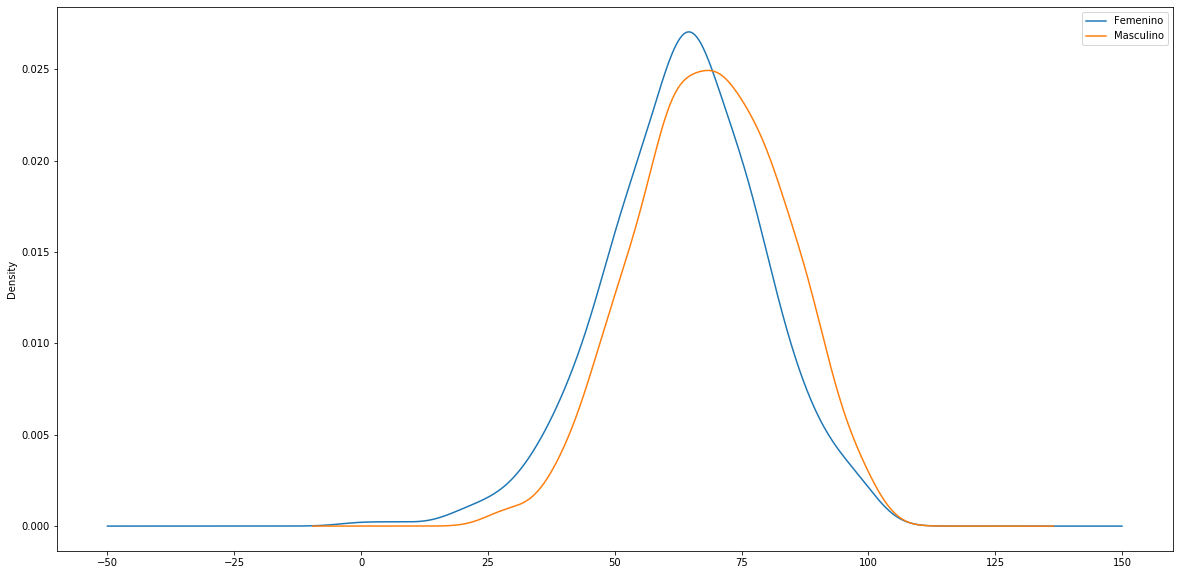

In [61]:
#fig = plt.figure(figsize=(30,10))
#plt.subplot2grid((2,3),(0,1))
#df.math.plot(kind='bar',alpha=1)
#plt.title('Notas de matematicas')
#plt.show()

figa = plt.figure(figsize=(20,10))
for t_gen in ['F','M']:
    df.math[df.gender == t_gen].plot(kind='kde')

plt.legend({"Femenino","Masculino"})
plt.show

Como se puede ver el promedio de las notas de matematicas para el genero Femenino anda entre el 60% y 67% y para el genero Masculino oscila entre el 64% y 74% de acuerdo a la grafica 

<function matplotlib.pyplot.show(*args, **kw)>

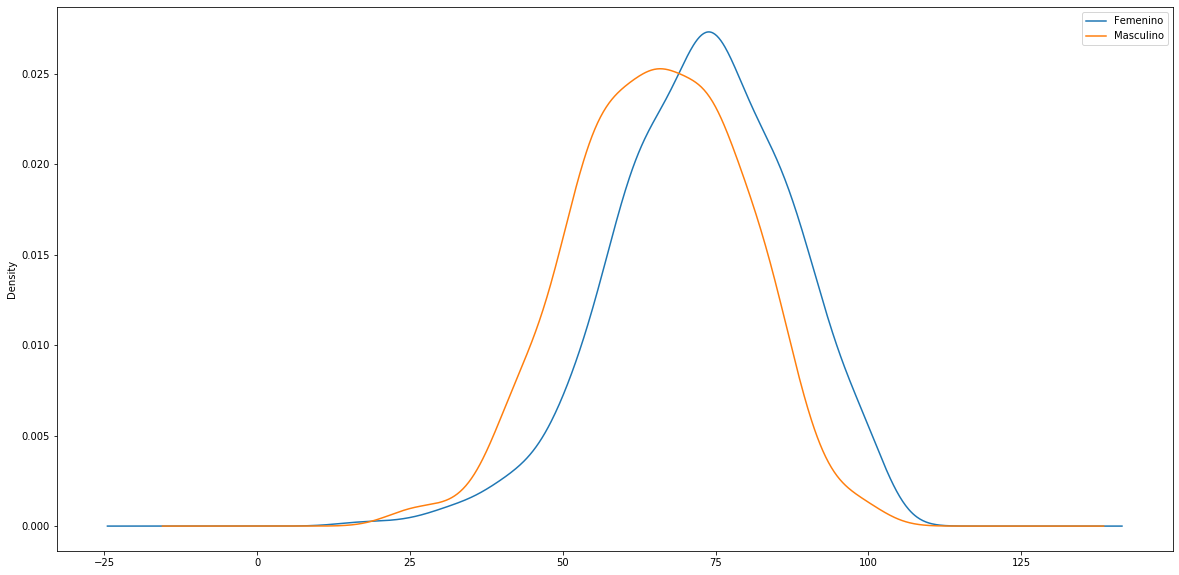

In [62]:
figb = plt.figure(figsize=(20,10))
for t_gen in ['F','M']:
    df.reading[df.gender == t_gen].plot(kind='kde')

plt.legend({"Femenino","Masculino"})
plt.show

Como se puede ver el promedio de las notas de lectura para el genero Femenino anda entre el 70% y 80% y para el genero Masculino oscila entre el 60% y 70% de acuerdo a la grafica

<function matplotlib.pyplot.show(*args, **kw)>

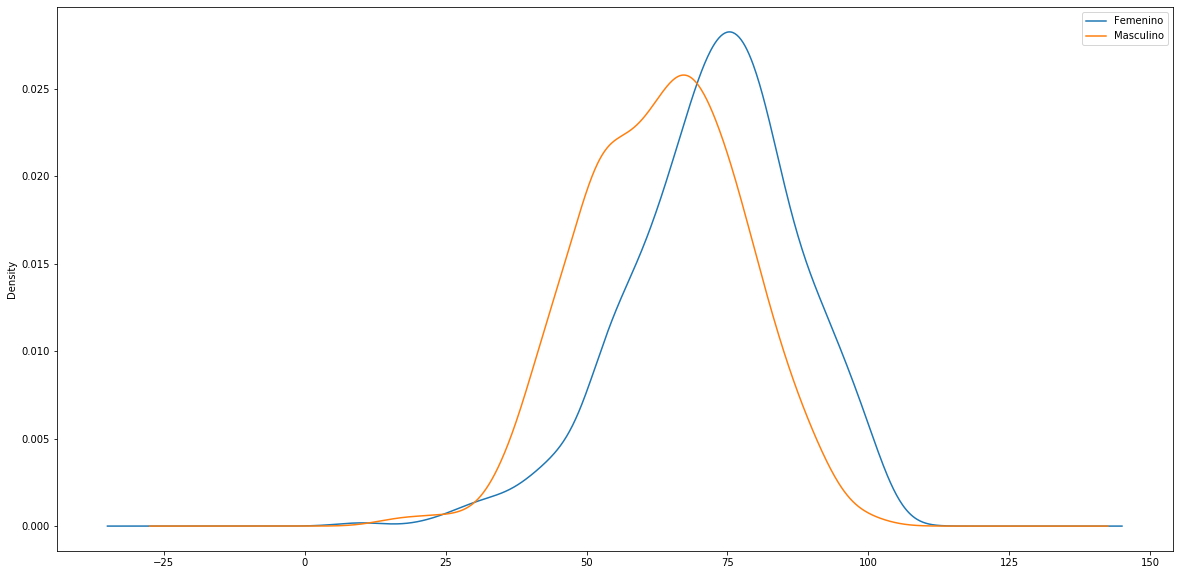

In [63]:
figc = plt.figure(figsize=(20,10))
for t_gen in ['F','M']:
    df.writing[df.gender == t_gen].plot(kind='kde')

plt.legend({"Femenino","Masculino"})
plt.show

Como se puede ver el promedio de las notas de escritura para el genero Femenino es alrededor del 75% y para el genero Masculino oscila entre el 68% y 75% de acuerdo a la grafica

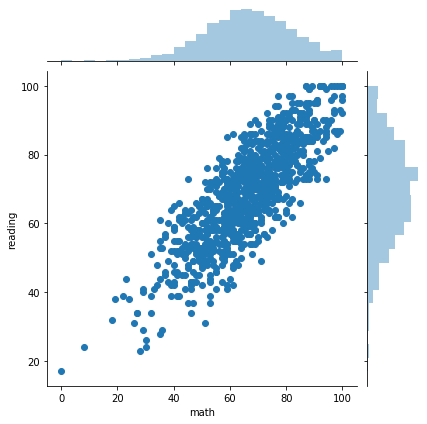

In [64]:
 # Binarizacion de genero
# Female = 1
# Male = 0

df['gender'] = df['gender'].replace({'M' : '0', 'F' : '1'})
sns.jointplot(data=df,x='math',y='reading')

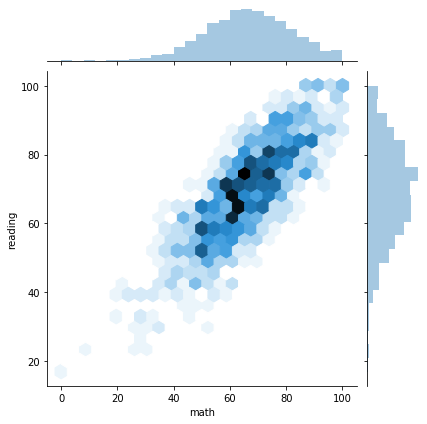

In [65]:
sns.jointplot(data=df,x='math',y='reading',kind='hex')

### Modelos de Lineales - Clasificacion

#### Logistic Regression

In [66]:
# Se definen las columnas a utilizar, para el caso de las x van a ser las columnas 6 y 7 que corresponden 
# a las notas de matematicas y de lectura y en el caso de las y va a ser la columna 1 que corresponde al genero
X = df.iloc[:,[5,6]].values
y = df.iloc[:,0]


In [67]:
# definimos que se van a utilizar el 25% de los datos del dataframe para pruebas
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)


In [68]:
# Se crea el modelo utilizando la clase LogisticRegression de la libreria sklearn y se hace el entrenamiento respectivo
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

D:\ProgramData\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
score_test =classifier.score(X_test, y_test)
print(score_test * 100)

82.39999999999999


### Modelos Lineales - Regresion

#### Regresión Lineal

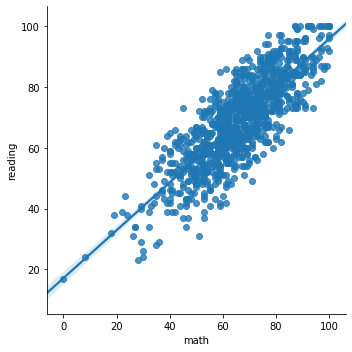

In [71]:
sns.lmplot(data = df, x = 'math', y ='reading')

In [72]:
#datos de entrenamiento
X = df['math'].values.reshape(-1,1)
y = df['reading'].values.reshape(-1,1)

In [73]:
# Creacion de datos de entrenamiento y testeo
X_train = X_train.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=10)

In [74]:

# Creación de la instancia del modelo
lm = LinearRegression()

In [75]:
# Entrenamiento del modelo
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
predictions = lm.predict(X_test)

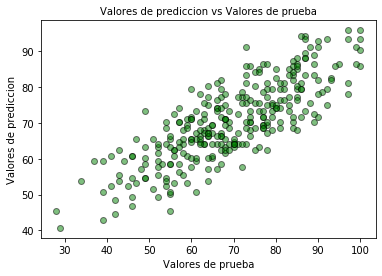

In [77]:
plt.scatter(y_test, predictions, c='g', edgecolors=(0, 0, 0), alpha=0.5)
plt.title('Valores de prediccion vs Valores de prueba', fontsize=10)
plt.xlabel('Valores de prueba')
plt.ylabel('Valores de prediccion')
plt.show()

#### Evaluacion del modelo

In [78]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))

MAE:  7.149453410663045


In [79]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE:  8.75948224882439


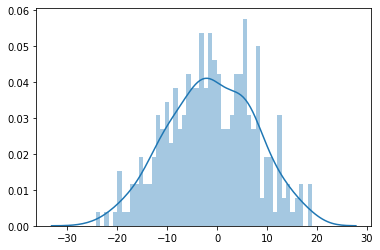

In [80]:
sns.distplot((y_test - predictions), bins = 50)
plt.show()